# Stock Analysis & Comparison

In [1]:
#pip install tagui

So let's now use TagUI for other useful stuff in our daily lives. The first thing that comes to mind is to use RPA for scraping purposes. So for the benefit of my future employer who may be interested in me, I'll be working on using RPA to scrape some useful data. Lets scrape data related to the stock market for now since its an easily retrievable dataset that we can pull out and make analysis with.

In [2]:
import tagui as t

In [3]:
class Stock(object):
    stockId = ""
    stockName = ""
    stockPrice = 0
    freeCashFlowPrev = ""
    freeCashFlowCurr = ""
    eps = 0
    dividendYield = ""
    peRatio = 0
    roe = ""
    netIncomePrev = ""
    netIncomeCurr = ""
    netOperatingIncomePrev = ""
    netOperatingIncomeCurr = ""
    
def make_stock(stockId, stockName, stockPrice, freeCashFlowPrev, freeCashFlowCurr, eps, dividendYield, peRatio, roe, netIncomePrev, netIncomeCurr, netOperatingIncomePrev, netOperatingIncomeCurr):
    stock = Stock()
    stock.stockId = stockId
    stock.stockName = stockName
    stock.stockPrice = stockPrice
    stock.freeCashFlowPrev = freeCashFlowPrev
    stock.freeCashFlowCurr = freeCashFlowCurr
    stock.eps = eps
    stock.dividendYield = dividendYield
    stock.peRatio = peRatio
    stock.roe = roe
    stock.netIncomePrev = netIncomePrev
    stock.netIncomeCurr = netIncomeCurr
    stock.netOperatingIncomePrev = netOperatingIncomePrev
    stock.netOperatingIncomeCurr = netOperatingIncomeCurr

    return stock

In [4]:
stock_array = list()
stocks = list()

number = input("Enter the number of stocks you want to analyze:")
print ('Enter each Stock ID, Eg.CJLU.SI: ')
for i in range(int(number)):
    n = input("Stock ID "+str(i+1)+": ")
    #We should carry out conditional checks here to verify that the Stock Listing is Valid before proceeding
    ######################################################################################################
    stock_array.append(n)
print ('Stock IDs:' ,stock_array)

Enter the number of stocks you want to analyze:2
Enter each Stock ID, Eg.CJLU.SI: 
Stock ID 1: cjlu.si
Stock ID 2: cne.si
Stock IDs: ['cjlu.si', 'cne.si']


In [5]:
#Open Yahoo stock site to scrape relevant data of stocks we want to look at.
url = 'https://sg.finance.yahoo.com/quote/'
t.init(visual_automation = True, chrome_browser = True)

#We then iterate through the stocks code that have been selected
for i in stock_array:
    newUrl = url + i +'/'
    t.url(newUrl)
    #Carry out scraping of data here
    t.wait(2)
    
    #Storing current price of the stock
    stockId = i
    stockPrice = float(t.read('//*[@id="quote-header-info"]/div[3]/div/div/span[1]'))
    stockName = t.read('//*[@id="quote-header-info"]/div[2]/div[1]/div[1]/h1')    
    
    #Storing key indicators of stock
    dividendYield = ((t.read('//*[@id="quote-summary"]/div[2]/table/tbody/tr[6]/td[2]')))
    peRatio = float((t.read('//*[@id="quote-summary"]/div[2]/table/tbody/tr[3]/td[2]/span')))
    eps = float((t.read('//*[@id="quote-summary"]/div[2]/table/tbody/tr[4]/td[2]/span')))
    
    #Go to the financials tab to scrape data
    t.click('//*[@id="quote-nav"]/ul/li[7]/a/span') 
    netIncomePrev = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[11]/div[1]/div[4]/span')))
    netIncomePrev = netIncomePrev.replace(',', '')

    netIncomeCurr = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[11]/div[1]/div[3]/span')))    
    netIncomeCurr = netIncomeCurr.replace(',', '')

    netOperatingIncomePrev = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[5]/div[1]/div[4]/span')))
    netOperatingIncomePrev = netOperatingIncomePrev.replace(',', '')

    netOperatingIncomeCurr = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[5]/div[1]/div[3]/span')))
    netOperatingIncomeCurr = netOperatingIncomeCurr.replace(',', '')

    #Go to the Cash Flow tab to scrape data
    t.click('//*[@id="Col1-1-Financials-Proxy"]/section/div[1]/div[1]/div/a[2]/div/span') 
    freeCashFlowPrev = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[7]/div[2]/div[3]/div[1]/div[4]/span')))
    freeCashFlowPrev = freeCashFlowPrev.replace(',', '')
    freeCashFlowCurr = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[7]/div[2]/div[3]/div[1]/div[3]/span')))
    freeCashFlowCurr = freeCashFlowCurr.replace(',', '')
    
    #Go to Statistics tab to scrape data
    t.click('//*[@id="quote-nav"]/ul/li[4]/a') 
    roe = ((t.read('//*[@id="Col1-0-KeyStatistics-Proxy"]/section/div[2]/div[3]/div/div[3]/div/table/tbody/tr[2]/td[2]')))
    
    stock = make_stock(stockId, stockName, stockPrice, freeCashFlowPrev, freeCashFlowCurr, eps, dividendYield, peRatio, roe, netIncomePrev, netIncomeCurr, netOperatingIncomePrev, netOperatingIncomeCurr)
    stocks.append(stock)
    
t.close()

True

In [6]:
for i in stocks[0:1]:
    print('Stock ID: ',i.stockId)
    print('Stock Name: ',i.stockName)
    print('Stock Price: ',i.stockPrice)
    print('Previous Year Net Income: ',i.netIncomePrev)
    print('Latest Net Income: ',i.netIncomeCurr)
    print('Previous Operating Income: ',i.netOperatingIncomePrev)
    print('Latest Operating Net Income: ',i.netOperatingIncomeCurr)
    print('Previous Free Cash Flow: ',i.freeCashFlowPrev)
    print('Latest Cash Flow: ',i.freeCashFlowCurr)
    print('Earnings Per Share: ',i.eps)
    print('Dividend Yield: ',i.dividendYield)
    print('PE Ratio: ',i.peRatio)
    print('ROE: ',i.roe)
    print(' ')
    
    #Use XPath!!!!

Stock ID:  cjlu.si
Stock Name:  NetLink NBN Trust (CJLU.SI)
Stock Price:  0.93
Previous Year Net Income:  49950
Latest Net Income:  77359
Previous Operating Income:  54468
Latest Operating Net Income:  85418
Previous Free Cash Flow:  -53730
Latest Cash Flow:  158542
Earnings Per Share:  0.021
Dividend Yield:  0.05 (5.33%)
PE Ratio:  44.29
ROE:  N/A
 


### Analysis & Visualisation of Scraped Data of Selected Stocks

In [27]:
#Change in Net Income
#Change in Operating Income
stockNames = list()
changeOpIncome = list()
changeNetIncome = list()

for i in stocks:
    stockNames.append(i.stockName)
    changeInOperatingIncome = float(i.netOperatingIncomeCurr) - float(i.netOperatingIncomePrev)
    changeOpIncome.append(changeInOperatingIncome)    
    changeInNetIncome = float(i.netIncomeCurr) - float(i.netIncomePrev)
    changeNetIncome.append(changeInNetIncome)

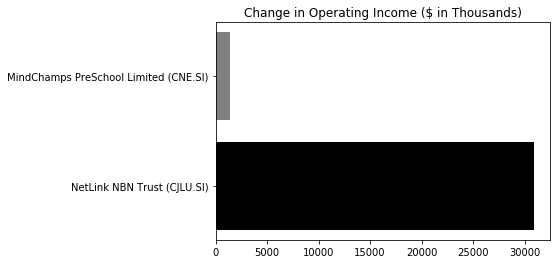

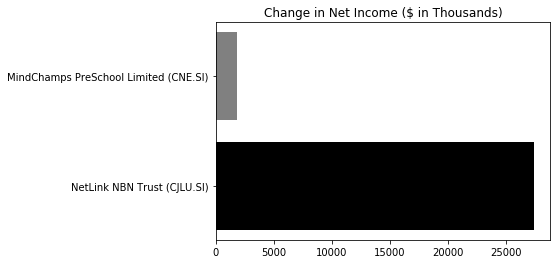

In [28]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltNetIncome
import numpy as np
plt.title('Change in Operating Income ($ in Thousands)')
plt.barh(stockNames, changeOpIncome, color=['black', 'grey', 'green', 'blue', 'cyan'])
plt.show()

pltNetIncome.title('Change in Net Income ($ in Thousands)')
pltNetIncome.barh(stockNames, changeNetIncome, color=['black', 'grey', 'green', 'blue', 'cyan'])
pltNetIncome.show()

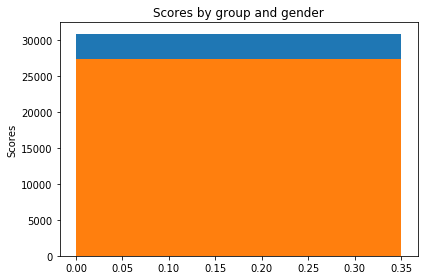

In [32]:
#Change in Free Cash Flow
#Current Cash Flow
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(width/2, changeOpIncome, width,
                label='Men')
rects2 = ax.bar(width/2, changeNetIncome, width, 
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')


fig.tight_layout()

plt.show()

In [ ]:

#Current Earnings Per Share
#PE Ratio
#ROE
#Dividend Yield

### Summary of Top 3 Stocks Based on Each Indicator